<a href="https://colab.research.google.com/github/lorinakhella/bug-in-the-code/blob/main/Lorina_George_Smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maternal Smoking

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/maternal-smoking/smoking.tsv")
df.shape

(610, 20)

In [ ]:
df.head()

,id,date,gestation,weight,parity,mom.race,mom.age,mom.edu,mom.height,mom.weight,dad.race,dad.age,dad.edu,dad.height,dad.weight,marital,income,smoke,quit.time,cigs
0,15,1411,284,120,1,asian,27,5,62,100,asian,31,5,65,110,1,1,never,0,0
1,20,1499,282,113,2,white,33,5,64,135,white,38,5,70,148,1,4,never,0,0
2,100,1673,286,136,4,white,25,2,62,93,white,28,2,64,130,1,4,until_pregnancy,2,2
3,129,1562,245,132,2,black,23,1,65,140,black,23,4,71,192,1,2,never,0,0
4,142,1408,289,120,3,white,25,4,62,125,white,26,1,70,180,0,2,never,0,0


## Q1. Does the mom's smoking pattern affect the newborn birth weight?

### Numerically

Let's first see how many different smoking patterns exist in the dataset. We will use the `groupby` function to group the rows (records) in the `DataFrame` by the `smoke` column (variable). Then count the number of different row per each smoking pattern using the `size` function.

In [ ]:
df.groupby('smoke').size()

smoke
never              282
now                216
once_not_now        60
until_pregnancy     52
dtype: int64

From the above, we can see that there are four different smoking patterns, `never` (282 rows), `once_not_now` (60 rows), `until_pregnancy` (52 rows), and `now` (216 rows).

Now, let's look at average baby weights for each of these patterns by grouping them and aggregating them by taking `median` of the `weight`.

In [ ]:
df.groupby('smoke').agg(Median_Baby_Weight = ('weight', 'median'),Median_mom_Weight = ('mom.weight', 'median')).reset_index()

,smoke,Median_Baby_Weight,Median_mom_Weight
0,never,123.0,126.0
1,now,114.5,125.0
2,once_not_now,123.5,130.0
3,until_pregnancy,124.5,120.5


From the table above, we can see that the moms who smoked during pregnancy (`now`) had babies of the lowest birth weight, average of `114.5`.

### Visually

<Axes: xlabel='smoke', ylabel='weight'>

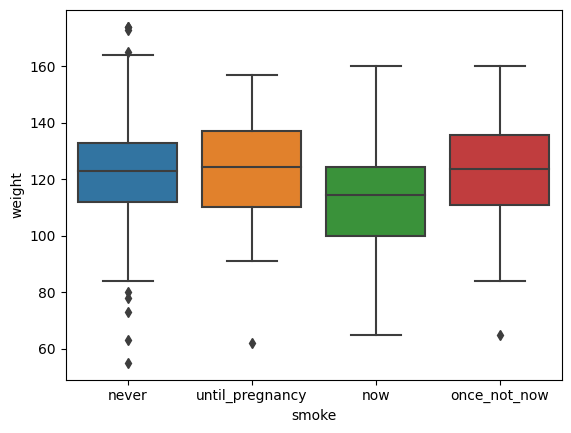

In [ ]:
sns.boxplot(data = df, x = 'smoke', y = 'weight')

The effects of maternal smoking on newborn weight are clearly illustrated above.

---

## Q2. Does the mom’s race affect the newborn birth weight?


<Axes: xlabel='mom.race', ylabel='weight'>

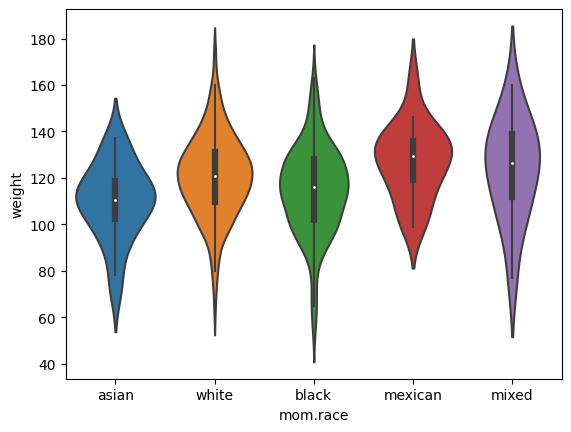

In [ ]:
sns.violinplot(x = 'mom.race' , y = 'weight' , data = df)

## Q3. Is there a correlation between the mom’s weight and the baby’s weight?


<Axes: xlabel='mom.weight', ylabel='weight'>

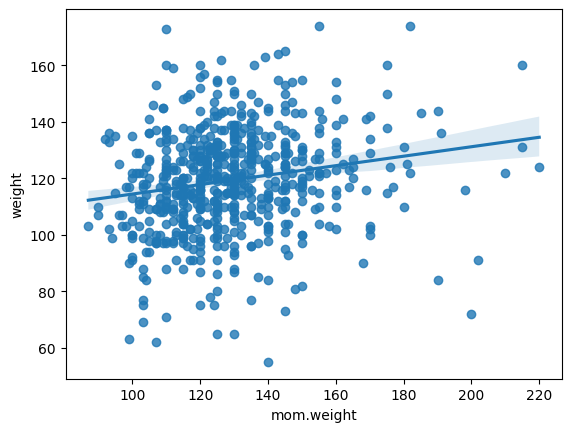

In [ ]:
sns.regplot(data = df, x = 'mom.weight', y = 'weight')

## Q4. Is there a correlation between the dad’s weight and the baby’s weight?

<Axes: xlabel='dad.weight', ylabel='dad.height'>

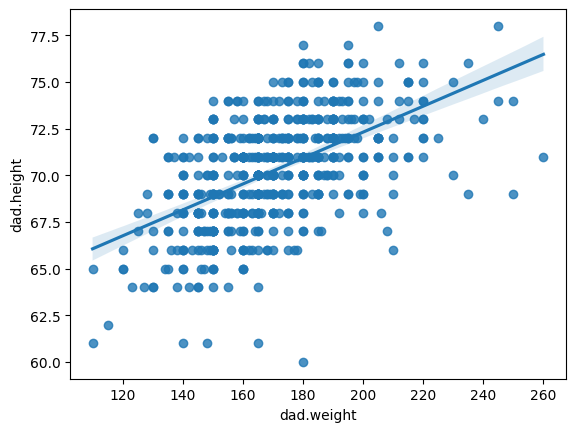

In [ ]:
sns.regplot(data = df, x = 'dad.weight', y = 'dad.height')

## Q5. From Q3 and Q4, which is a stronger correlation?

the correlation between the dad’s weight and the dad's height is stronger. Since most of the points in this relationship are on the deflection line, and the angle of deflection is greater than that in the relationship between mom’s weight and the baby’s weigh.

## Q6. Is there a correlation between the mom’s weight and the dad’s weight?

<Axes: xlabel='mom.weight', ylabel='dad.weight'>

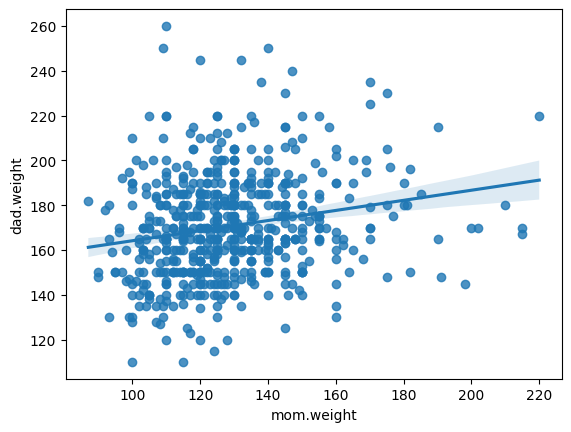

In [ ]:
sns.regplot(data = df, x = 'mom.weight', y = 'dad.weight')

## Q7. On average, does the mom’s weight change across the races?

<Axes: xlabel='mom.race', ylabel='mom.weight'>

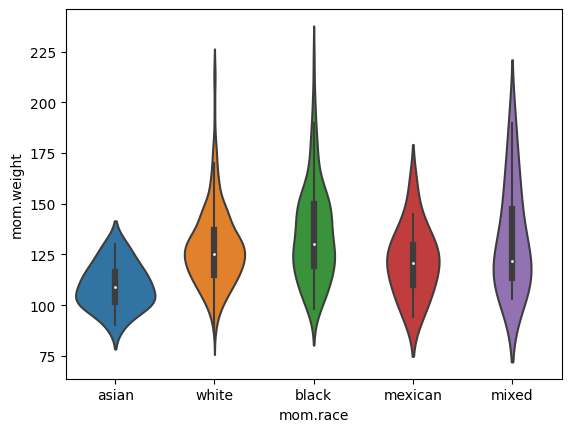

In [ ]:
sns.violinplot(data = df, x = 'mom.race', y = 'mom.weight')

<Axes: xlabel='mom.race', ylabel='mom.weight'>

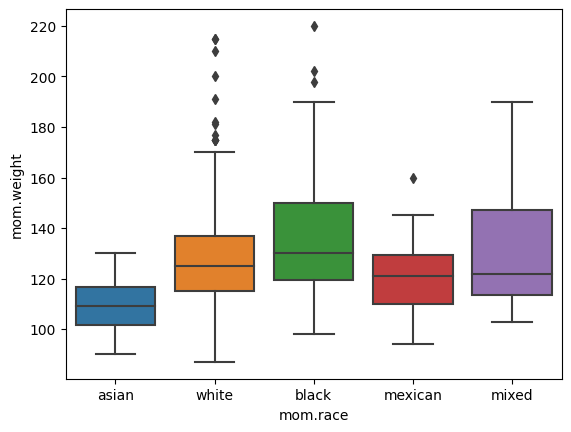

In [ ]:
sns.boxplot(data = df, x = 'mom.race', y = 'mom.weight')

## Q8. Does mom’s smoking pattern change with the mom’s education?

In [ ]:
df.groupby(['mom.edu', 'smoke']).size().reset_index()

,mom.edu,smoke,0
0,0,never,1
1,0,once_not_now,1
2,0,until_pregnancy,1
3,1,never,26
4,1,now,46
5,1,once_not_now,6
6,1,until_pregnancy,7
7,2,never,103
8,2,now,90
9,2,once_not_now,14


In [ ]:
counts = df.groupby(['mom.edu', 'smoke']).size().reset_index(name = 'count')
counts

,mom.edu,smoke,count
0,0,never,1
1,0,once_not_now,1
2,0,until_pregnancy,1
3,1,never,26
4,1,now,46
5,1,once_not_now,6
6,1,until_pregnancy,7
7,2,never,103
8,2,now,90
9,2,once_not_now,14


<Axes: xlabel='mom.edu', ylabel='size'>

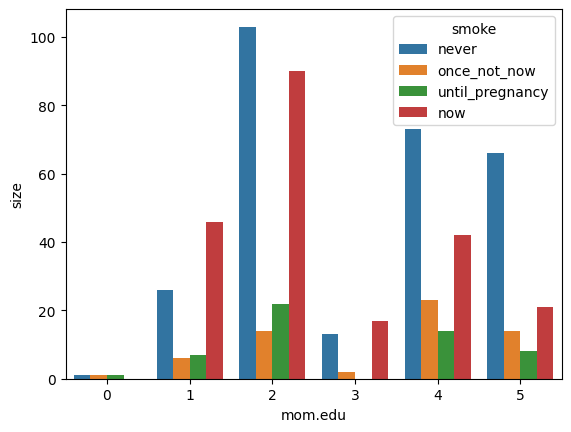

In [ ]:
counts = df.groupby(['mom.edu','smoke']).size().to_frame('size').reset_index()
sns.barplot(data=counts, x='mom.edu' ,y='size', hue='smoke')

In [ ]:
totals = df.groupby(['mom.edu']).size().reset_index(name = 'total')
totals

,mom.edu,total
0,0,3
1,1,85
2,2,229
3,3,32
4,4,152
5,5,109


In [ ]:
merged = counts.merge (totals, on = 'mom.edu')
merged

,mom.edu,smoke,count,total
0,0,never,1,3
1,0,once_not_now,1,3
2,0,until_pregnancy,1,3
3,1,never,26,85
4,1,now,46,85
5,1,once_not_now,6,85
6,1,until_pregnancy,7,85
7,2,never,103,229
8,2,now,90,229
9,2,once_not_now,14,229


In [ ]:
percentages = merged.assign(percentage = 100 * merged['count'] / merged['total'])
percentages

,mom.edu,smoke,count,total,percentage
0,0,never,1,3,33.333333
1,0,once_not_now,1,3,33.333333
2,0,until_pregnancy,1,3,33.333333
3,1,never,26,85,30.588235
4,1,now,46,85,54.117647
5,1,once_not_now,6,85,7.058824
6,1,until_pregnancy,7,85,8.235294
7,2,never,103,229,44.978166
8,2,now,90,229,39.301310
9,2,once_not_now,14,229,6.113537


<Axes: xlabel='mom.edu', ylabel='percentage'>

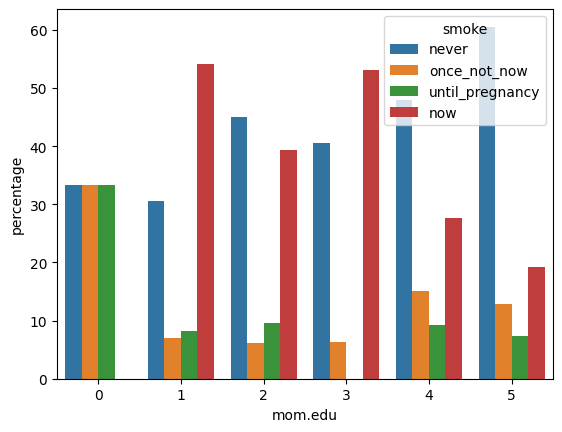

In [ ]:
sns.barplot(data = percentages, x = "mom.edu", y = 'percentage', hue = 'smoke')

## Q9. Does mom’s smoking pattern change with the family income?

In [ ]:
counts = df.groupby(['income', 'smoke']).size().reset_index(name = 'count')
counts

,income,smoke,count
0,0,never,6
1,0,now,4
2,0,until_pregnancy,2
3,1,never,44
4,1,now,41
5,1,once_not_now,5
6,1,until_pregnancy,10
7,2,never,48
8,2,now,37
9,2,once_not_now,6


<Axes: xlabel='income', ylabel='count'>

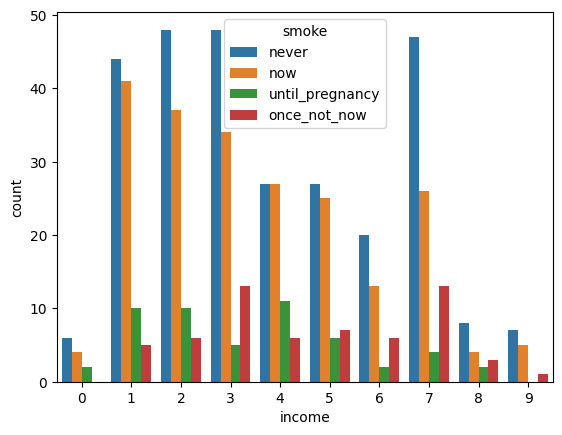

In [ ]:
sns.barplot(data = counts, x = "income", y = 'count', hue = 'smoke')

In [ ]:
totals = df.groupby(['income']).size().reset_index(name = 'total')
totals

,income,total
0,0,12
1,1,100
2,2,101
3,3,100
4,4,71
5,5,65
6,6,41
7,7,90
8,8,17
9,9,13


In [ ]:
merged = counts.merge (totals, on = 'income')
merged

,income,smoke,count,total
0,0,never,6,12
1,0,now,4,12
2,0,until_pregnancy,2,12
3,1,never,44,100
4,1,now,41,100
5,1,once_not_now,5,100
6,1,until_pregnancy,10,100
7,2,never,48,101
8,2,now,37,101
9,2,once_not_now,6,101


In [ ]:
percentages = merged.assign(percentage = 100 * merged['count'] / merged['total'])
percentages

,income,smoke,count,total,percentage
0,0,never,6,12,50.000000
1,0,now,4,12,33.333333
2,0,until_pregnancy,2,12,16.666667
3,1,never,44,100,44.000000
4,1,now,41,100,41.000000
5,1,once_not_now,5,100,5.000000
6,1,until_pregnancy,10,100,10.000000
7,2,never,48,101,47.524752
8,2,now,37,101,36.633663
9,2,once_not_now,6,101,5.940594


<Axes: xlabel='income', ylabel='percentage'>

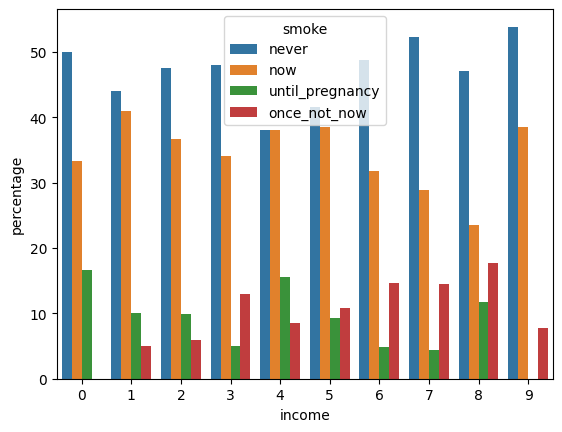

In [ ]:
sns.barplot(data = percentages, x = "income", y = 'percentage', hue = 'smoke')

The percentage of mothers who have never smoked or smoke till now is similar at each income level. The significant difference appears only in mothers who used to smoke and then stopped smoking, as these mothers are more prevalent than within the income level from 1 to 9.



## Q10. Is there a relationship between the mom’s race and the dad’s race?

In [ ]:
counts = df.groupby(['mom.race', 'dad.race']).size().reset_index(name = 'count')
counts

,mom.race,dad.race,count
0,asian,asian,22
1,asian,white,2
2,black,black,126
3,black,mixed,5
4,mexican,mexican,15
5,mexican,white,3
6,mixed,black,3
7,mixed,mexican,1
8,mixed,mixed,6
9,mixed,white,4


<Axes: xlabel='mom.race', ylabel='count'>

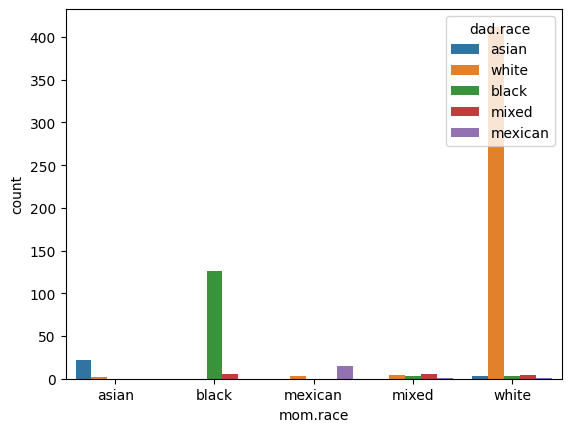

In [ ]:
sns.barplot(data = counts, x = "mom.race", y = 'count', hue = 'dad.race')

In [ ]:
totals = df.groupby(['mom.race']).size().reset_index(name = 'total')
totals

,mom.race,total
0,asian,24
1,black,131
2,mexican,18
3,mixed,14
4,white,423


In [ ]:
merged = counts.merge (totals, on = 'mom.race')
merged

,mom.race,dad.race,count,total
0,asian,asian,22,24
1,asian,white,2,24
2,black,black,126,131
3,black,mixed,5,131
4,mexican,mexican,15,18
5,mexican,white,3,18
6,mixed,black,3,14
7,mixed,mexican,1,14
8,mixed,mixed,6,14
9,mixed,white,4,14


In [ ]:
percentages = merged.assign(percentage = 100 * merged['count'] / merged['total'])
percentages

,mom.race,dad.race,count,total,percentage
0,asian,asian,22,24,91.666667
1,asian,white,2,24,8.333333
2,black,black,126,131,96.183206
3,black,mixed,5,131,3.816794
4,mexican,mexican,15,18,83.333333
5,mexican,white,3,18,16.666667
6,mixed,black,3,14,21.428571
7,mixed,mexican,1,14,7.142857
8,mixed,mixed,6,14,42.857143
9,mixed,white,4,14,28.571429


<Axes: xlabel='mom.race', ylabel='percentage'>

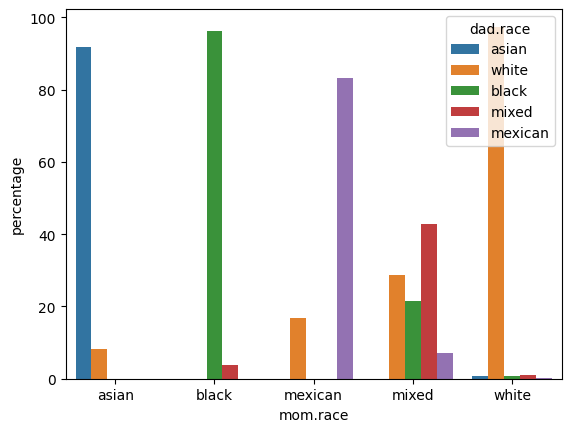

In [ ]:
sns.barplot(data = percentages, x = "mom.race", y = 'percentage', hue = 'dad.race')

A large percentage of mothers marry men of the same race, but there is a small percentage of mothers who marry men of another race.
The race of men is very close in the case of mixed mothers